# Facebook Data Crawling
After the data is collected, we need to process the data to make it more readable and easier to analyze. We can do some simple visualization to see the data distribution and the relationship between the data. We can also do some simple data cleaning to remove the data that is not needed. In this notebook, we will do some simple data processing on the data we collected from Facebook.

In [2]:
%pip install matplotlib pandas numpy seaborn wordcloud

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
raw_df = pd.read_csv('Data\RDVNReborn_after.csv')


In [5]:
raw_df

,post_id,text,post_text,time,timestamp,image,image_lowquality,images,images_description,images_lowquality,...,comments_full,reactors,w3_fb_url,reactions,reaction_count,page_id,image_id,image_ids,was_live,fetched_time
0,3218746788224789,[SECRET SANTA 2020 VÀ LỜI TẠM BIỆT]\n\n_______...,SECRET SANTA 2020 V LI TM BIT\n\n\n\nVy l mt ...,2021-01-31 19:43:17,1612096997,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,NaN,NaN,['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '1505187503582041', 'comment_u...",[],https://www.facebook.com/RDVNReborn/posts/3218...,"{'thích': 934, 'yêu thích': 489, 'haha': 2, 'w...",1481,1.774458e+15,NaN,[],False,2023-11-12 20:38:05.354074
1,3022854274480709,Ding dong ding dong ding dong! Các bạn có nghe...,Ding dong ding dong ding dong Cc bn c nghe tin...,2020-11-11 19:00:08,1605096008,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,['Không có mô tả ảnh.'],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '3057617011004435', 'comment_u...","[{'name': 'Uông Trang', 'link': 'https://faceb...",https://www.facebook.com/RDVNReborn/posts/3022...,"{'thích': 1158, 'yêu thích': 340, 'haha': 5, '...",1557,1.774458e+15,3.022893e+15,['3022892694476867'],False,2023-11-12 20:38:24.371586
2,3018251171607686,Đơn đăng ký tham gia sự kiện Secret Santa năm ...,n ng k tham gia s kin Secret Santa nm 2020 c t...,2020-11-09 22:57:03,1604937423,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,['Không có mô tả ảnh.'],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '3075690949197041', 'comment_u...","[{'name': 'Uông Trang', 'link': 'https://faceb...",https://www.facebook.com/RDVNReborn/posts/3018...,"{'thích': 868, 'yêu thích': 258, 'haha': 8, 'w...",1170,1.774458e+15,3.018251e+15,['3018251171607686'],False,2023-11-12 20:39:16.269983
3,3018250674941069,Đoán xem chuyện gì sẽ xảy ra vào 19:00 ngày 11...,on xem chuyn g s xy ra vo 1900 ngy 11112020,2020-11-09 22:56:39,1604937399,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,['Không có mô tả ảnh.'],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '3022830134483123', 'comment_u...","[{'name': 'LN Lam Anh', 'link': 'https://faceb...",https://www.facebook.com/RDVNReborn/posts/3018...,"{'thích': 3619, 'yêu thích': 843, 'haha': 40, ...",4622,1.774458e+15,NaN,[],False,2023-11-12 20:41:06.219635
4,2974690422630428,[Harperween]\n\nr/nosleep\nu/dr_harper\n\nTẬP ...,Harperween\n\nrnosleep\nudrharper\n\nTP 3 H s ...,2020-11-01 21:00:03,1604239203,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t1.6...,[],[],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '448949067191832', 'comment_ur...","[{'name': 'RDVN', 'link': 'https://facebook.co...",https://www.facebook.com/RDVNReborn/posts/2974...,"{'thích': 527, 'yêu thích': 60, 'haha': 4, 'wo...",604,1.774458e+15,2.974690e+15,['2974689902630480'],False,2023-11-12 20:42:41.592004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,2274543335978477,r/videos\nu/MyLigaments (83.8k points - x1 pla...,rvideos\nuMyLigaments 838k points x1 platinum...,2020-01-08 18:37:44,1578483464,NaN,https://scontent.fhan14-2.fna.fbcdn.net/v/t15....,[],[],['https://scontent.fhan14-2.fna.fbcdn.net/v/t1...,...,"[{'comment_id': '2274553012644176', 'comment_u...","[{'name': 'RDVN', 'link': 'https://facebook.co...",https://www.facebook.com/RDVNReborn/posts/2274...,"{'thích': 1761, 'yêu thích': 147, 'haha': 697,...",2619,1.774458e+15,NaN,[],False,2023-11-12 21:36:02.477781
95,2274034079362736,r/pics\nu/Pontus_Pilates (2.4k points - x1 sil...,rpics\nuPontusPilates 24k points x1 silver\n\...,2020-01-08 11:52:42,1578459162,https://s

In [6]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   post_id                        99 non-null     int64  
 1   text                           95 non-null     object 
 2   post_text                      95 non-null     object 
 3   time                           99 non-null     object 
 4   timestamp                      99 non-null     int64  
 5   image                          87 non-null     object 
 6   image_lowquality               99 non-null     object 
 7   images                         95 non-null     object 
 8   images_description             95 non-null     object 
 9   images_lowquality              99 non-null     object 
 10  images_lowquality_description  99 non-null     object 
 11  video                          4 non-null      object 
 12  video_id                       4 non-null      float

In [7]:
first_row = raw_df.iloc[0]
reactions = dict(eval(first_row['reactions']))
reactions["shares"] = first_row['shares']
reactions["comments"] = first_row['comments']

In [8]:
reactions

{'thích': 934,
 'yêu thích': 489,
 'haha': 2,
 'wow': 2,
 'thương thương': 39,
 'buồn': 15,
 'shares': 56,
 'comments': 45}

In [9]:
raw_df[['post_id','reactions']]

,post_id,reactions
0,3218746788224789,"{'thích': 934, 'yêu thích': 489, 'haha': 2, 'w..."
1,3022854274480709,"{'thích': 1158, 'yêu thích': 340, 'haha': 5, '..."
2,3018251171607686,"{'thích': 868, 'yêu thích': 258, 'haha': 8, 'w..."
3,3018250674941069,"{'thích': 3619, 'yêu thích': 843, 'haha': 40, ..."
4,2974690422630428,"{'thích': 527, 'yêu thích': 60, 'haha': 4, 'wo..."
...,...,...
94,2274543335978477,"{'thích': 1761, 'yêu thích': 147, 'haha': 697,..."
95,2274034079362736,"{'thích': 4161, 'yêu thích': 1621, 'haha': 5, ..."
96,2271818036251007,"{'thích': 7175, 'yêu thích': 149, 'haha': 10, ..."
97,2271907529575391,"{'thích': 4207, 'yêu thích': 228, 'haha': 1923..."


In [10]:
raw_df[['time','timestamp' ,'reaction_count']]

,time,timestamp,reaction_count
0,2021-01-31 19:43:17,1612096997,1481
1,2020-11-11 19:00:08,1605096008,1557
2,2020-11-09 22:57:03,1604937423,1170
3,2020-11-09 22:56:39,1604937399,4622
4,2020-11-01 21:00:03,1604239203,604
...,...,...,...
94,2020-01-08 18:37:44,1578483464,2619
95,2020-01-08 11:52:42,1578459162,6873
96,2020-01-07 21:00:30,1578405630,7936
97,2020-01-07 18:00:04,1578394804,6387


## Reactions analysis

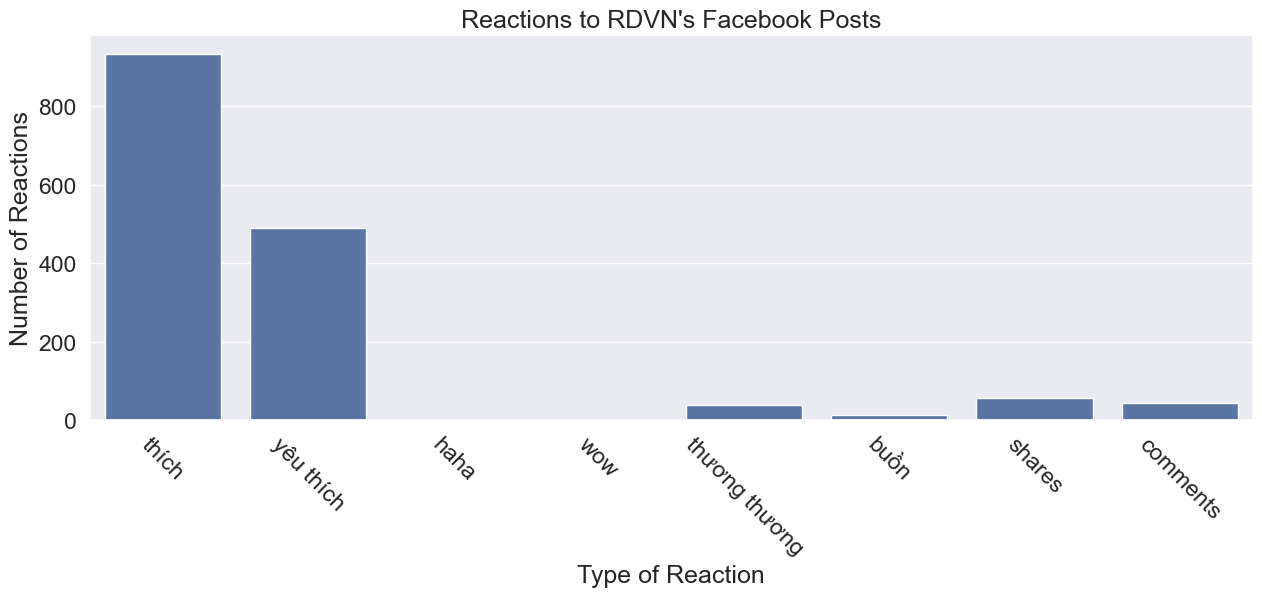

In [11]:
sns.set_theme(style="whitegrid")
sns.set(rc={'figure.figsize':(15,5)})
sns.set(font_scale=1.5)

# plot the reactions
fig, ax = plt.subplots()
ax = sns.barplot(x=list(reactions.keys()), y=list(reactions.values()))
ax.set_title("Reactions to RDVN's Facebook Posts")
ax.set_ylabel("Number of Reactions")
ax.set_xlabel("Type of Reaction")
plt.xticks(rotation=-45)
plt.show()

## Read all posts

In [12]:
df_text = raw_df[['post_id','post_text']]
text    = str(df_text['post_text'])

df_text

,post_id,post_text
0,3218746788224789,SECRET SANTA 2020 V LI TM BIT\n\n\n\nVy l mt ...
1,3022854274480709,Ding dong ding dong ding dong Cc bn c nghe tin...
2,3018251171607686,n ng k tham gia s kin Secret Santa nm 2020 c t...
3,3018250674941069,on xem chuyn g s xy ra vo 1900 ngy 11112020
4,2974690422630428,Harperween\n\nrnosleep\nudrharper\n\nTP 3 H s ...
...,...,...
94,2274543335978477,rvideos\nuMyLigaments 838k points x1 platinum...
95,2274034079362736,rpics\nuPontusPilates 24k points x1 silver\n\...
96,2271818036251007,rtodayilearned\nuiQuanah 14k points\n\nChuyn m...
97,2271907529575391,Gii thiu subreddit rIDontWorkHereLady l subred...


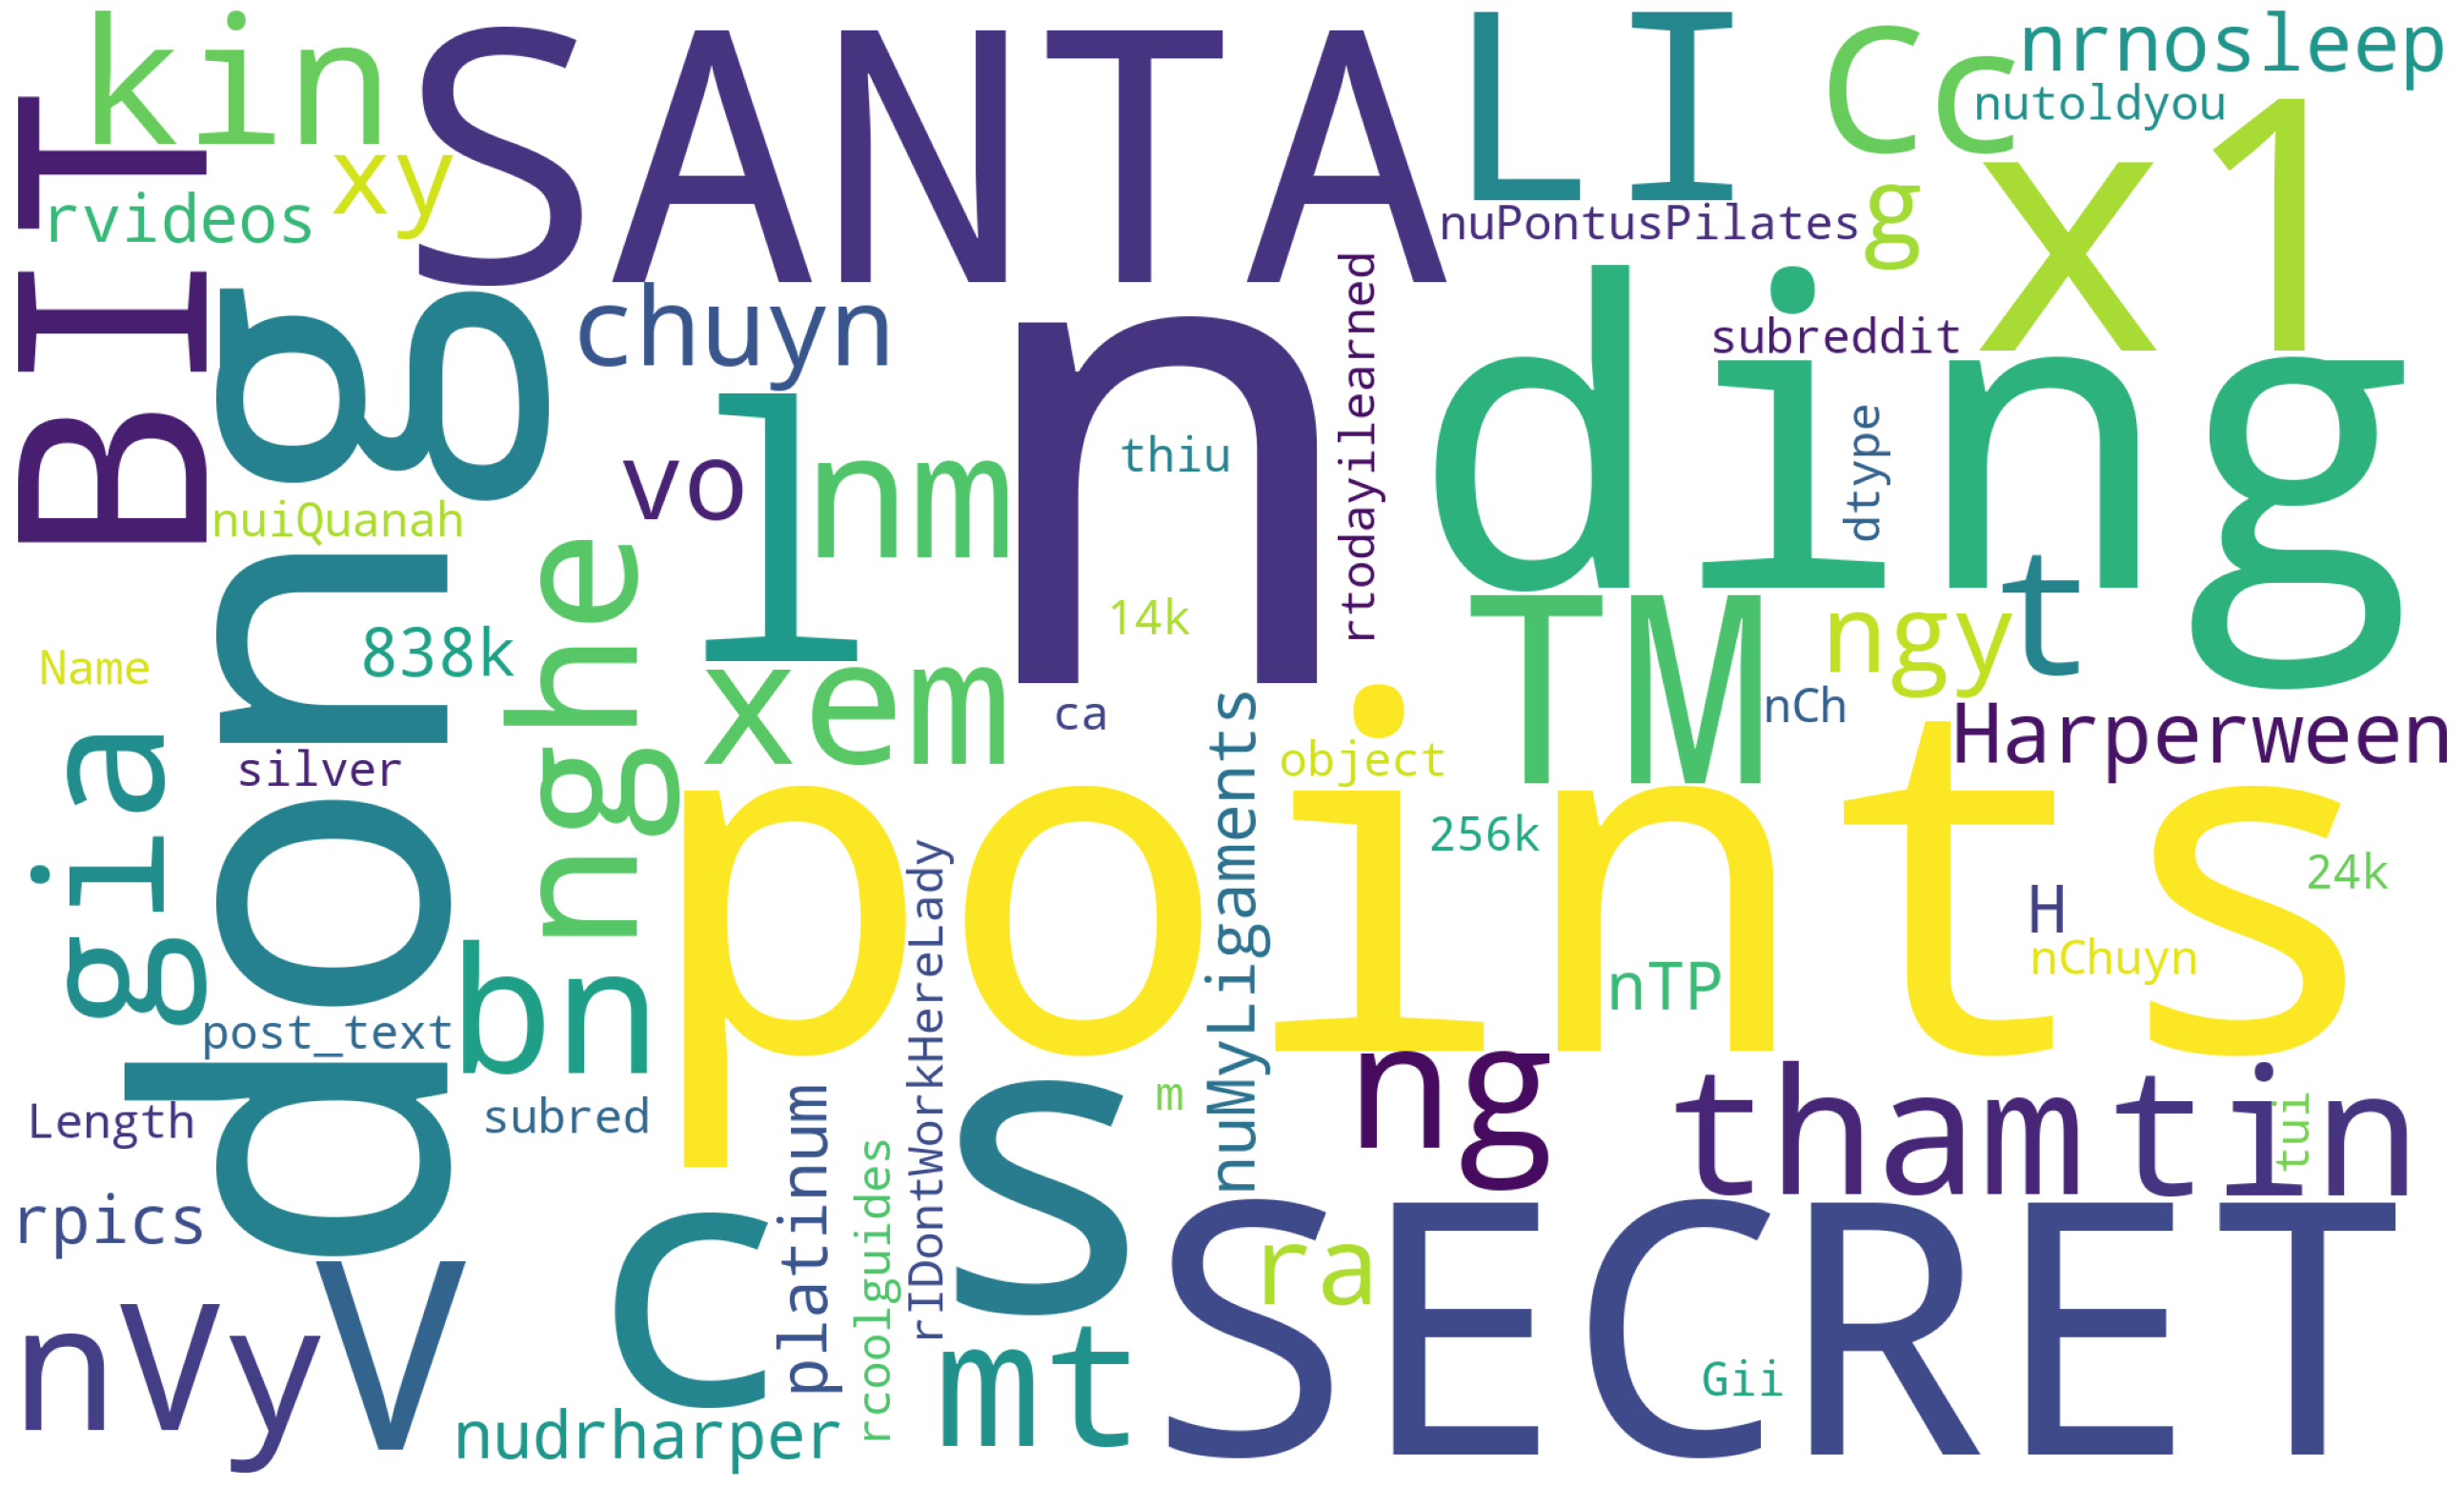

In [13]:
from wordcloud import WordCloud, STOPWORDS

wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(
                             text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

SỰ THAY ĐỔI LƯỢT REACT THEO THỜI GIAN

Text(0.5, 1.0, 'Sự thay đổi lượt react theo thời gian')

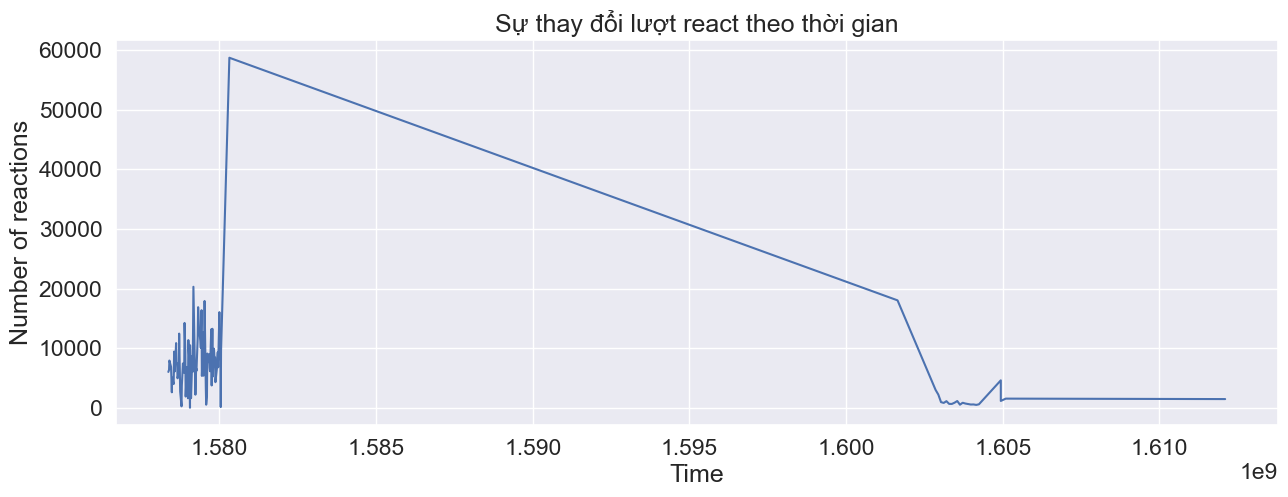

In [14]:
df=raw_df
dates=df['timestamp'].to_list()
reaction_count=df['reaction_count'].to_list()
dates.reverse()
reaction_count.reverse()
plt.plot(dates,reaction_count)
plt.xlabel('Time')
plt.ylabel('Number of reactions')
plt.title('Sự thay đổi lượt react theo thời gian')

Text(0, 0.5, 'Reactions Count')

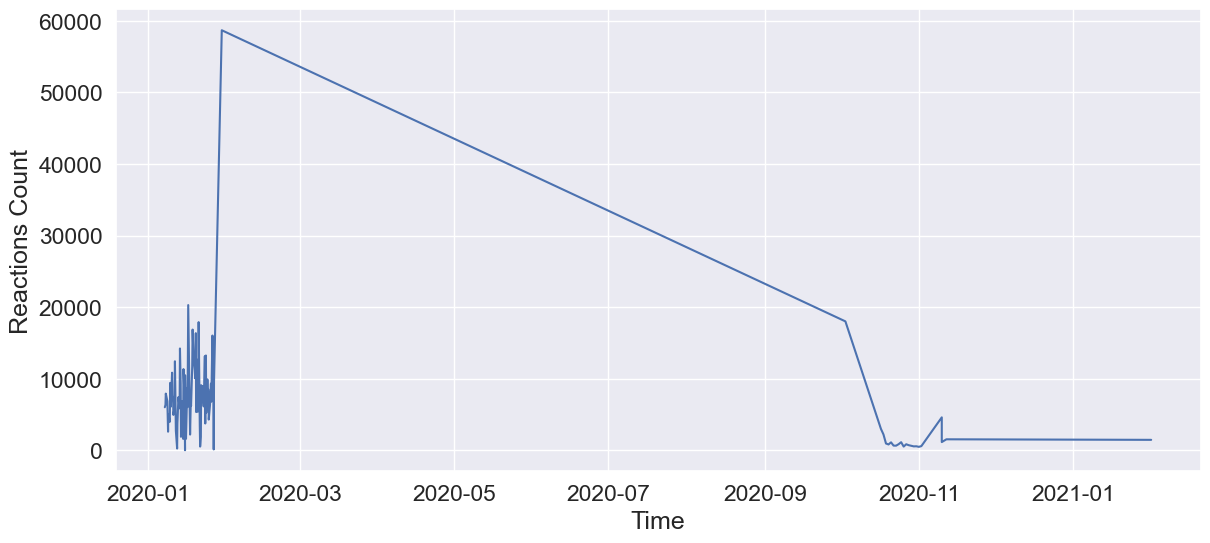

In [15]:
df['time'] = pd.to_datetime(df['time'])
plt.figure(figsize=(14, 6))

plt.plot(df['time'], df['reaction_count'])
plt.xlabel('Time')
plt.ylabel('Reactions Count')

SỰ THAY ĐỔI CỦA TỪNG LOẠI REACT

In [16]:
df['reactions'] = df['reactions'].apply(lambda x : dict(eval(x)) )
df_detailReactions = df['reactions'].apply(pd.Series )
     

C:\Users\Admin\AppData\Local\Temp\ipykernel_19880\2257331557.py:2: FutureWarning: Returning a DataFrame from Series.apply when the supplied function returns a Series is deprecated and will be removed in a future version.
  df_detailReactions = df['reactions'].apply(pd.Series )


In [17]:
df_detailReactions = pd.concat([df, df_detailReactions], axis=1).drop('reactions', axis=1)
df_detailReactions[['post_id','post_text','thích','yêu thích','haha','wow','buồn','phẫn nộ','thương thương',
                                 'shares','comments','reaction_count']]

,post_id,post_text,thích,yêu thích,haha,wow,buồn,phẫn nộ,thương thương,shares,comments,reaction_count
0,3218746788224789,SECRET SANTA 2020 V LI TM BIT\n\n\n\nVy l mt ...,934.0,489.0,2.0,2.0,15.0,NaN,39.0,56,45,1481
1,3022854274480709,Ding dong ding dong ding dong Cc bn c nghe tin...,1158.0,340.0,5.0,5.0,21.0,NaN,28.0,75,513,1557
2,3018251171607686,n ng k tham gia s kin Secret Santa nm 2020 c t...,868.0,258.0,8.0,10.0,6.0,NaN,20.0,54,246,1170
3,3018250674941069,on xem chuyn g s xy ra vo 1900 ngy 11112020,3619.0,843.0,40.0,33.0,10.0,1.0,76.0,34,213,4622
4,2974690422630428,Harperween\n\nrnosleep\nudrharper\n\nTP 3 H s ...,527.0,60.0,4.0,7.0,4.0,NaN,2.0,37,16,604
...,...,...,...,...,...,...,...,...,...,...,...,...
94,2274543335978477,rvideos\nuMyLigaments 838k points x1 platinum...,1761.0,147.0,697.0,7.0,6.0,NaN,1.0,387,140,2619
95,2274034079362736,rpics\nuPontusPilates 24k points x1 silver\n\...,4161.0,1621.0,5.0,2.0,1083.0,NaN,1.0,236,38,6873
96,2271818036251007,rtodayilearned\nuiQuanah 14k points\n\nChuyn m...,7175.0,149.0,10.0,31.0,569.0,2.0,NaN,539,287,7936
97,2271907529575391,Gii thiu subreddit rIDontWorkHereLady l subred...,4207.0,228.0,1923.0,6.0,22.0,1.0,NaN,409,288,6387


In [18]:
df_detailReactions.fillna(0,inplace=True)


(array([18262., 18322., 18383., 18444., 18506., 18567., 18628.]),
 [Text(18262.0, 0, '2020-01'),
  Text(18322.0, 0, '2020-03'),
  Text(18383.0, 0, '2020-05'),
  Text(18444.0, 0, '2020-07'),
  Text(18506.0, 0, '2020-09'),
  Text(18567.0, 0, '2020-11'),
  Text(18628.0, 0, '2021-01')])

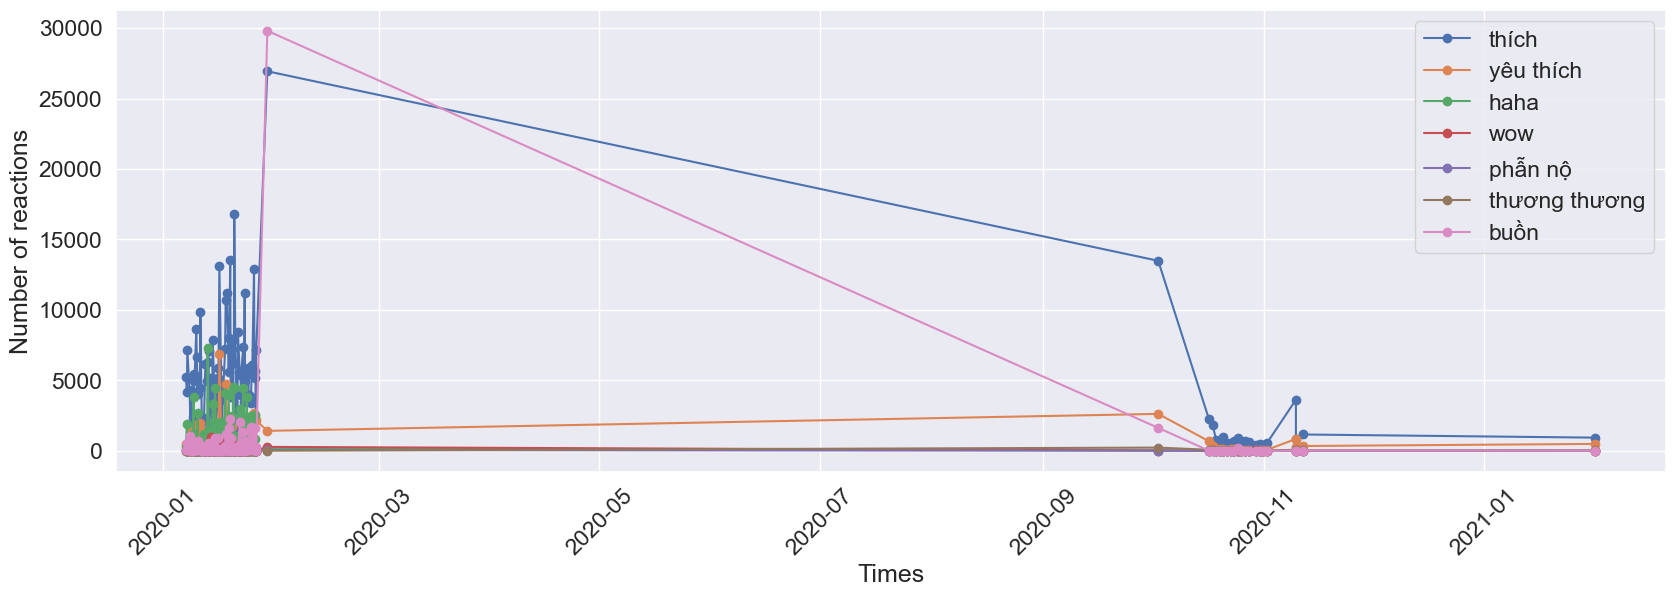

In [19]:
import datetime
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates
fig, ax = plt.subplots(figsize=(20,6))

ax.plot(df_detailReactions['time'],df_detailReactions['thích'],label='thích',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['yêu thích'],label='yêu thích',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['haha'],label='haha',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['wow'],label='wow',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['phẫn nộ'],label='phẫn nộ',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['thương thương'],label='thương thương',marker='o')
ax.plot(df_detailReactions['time'],df_detailReactions['buồn'],label='buồn',marker='o')
ax.set_xlabel('Times')
ax.set_ylabel('Number of reactions')

plt.legend()
plt.xticks(rotation=45)

BÀI VIẾT CÓ LƯỢNG TƯƠNG TÁC LỚN NHẤT TRONG BỘ DỮ LIỆU

In [20]:
most10_post=df.sort_values(by='reaction_count',ascending=False).head(10)[['post_id','text','time']]

In [21]:
text    = str(most10_post['text'])

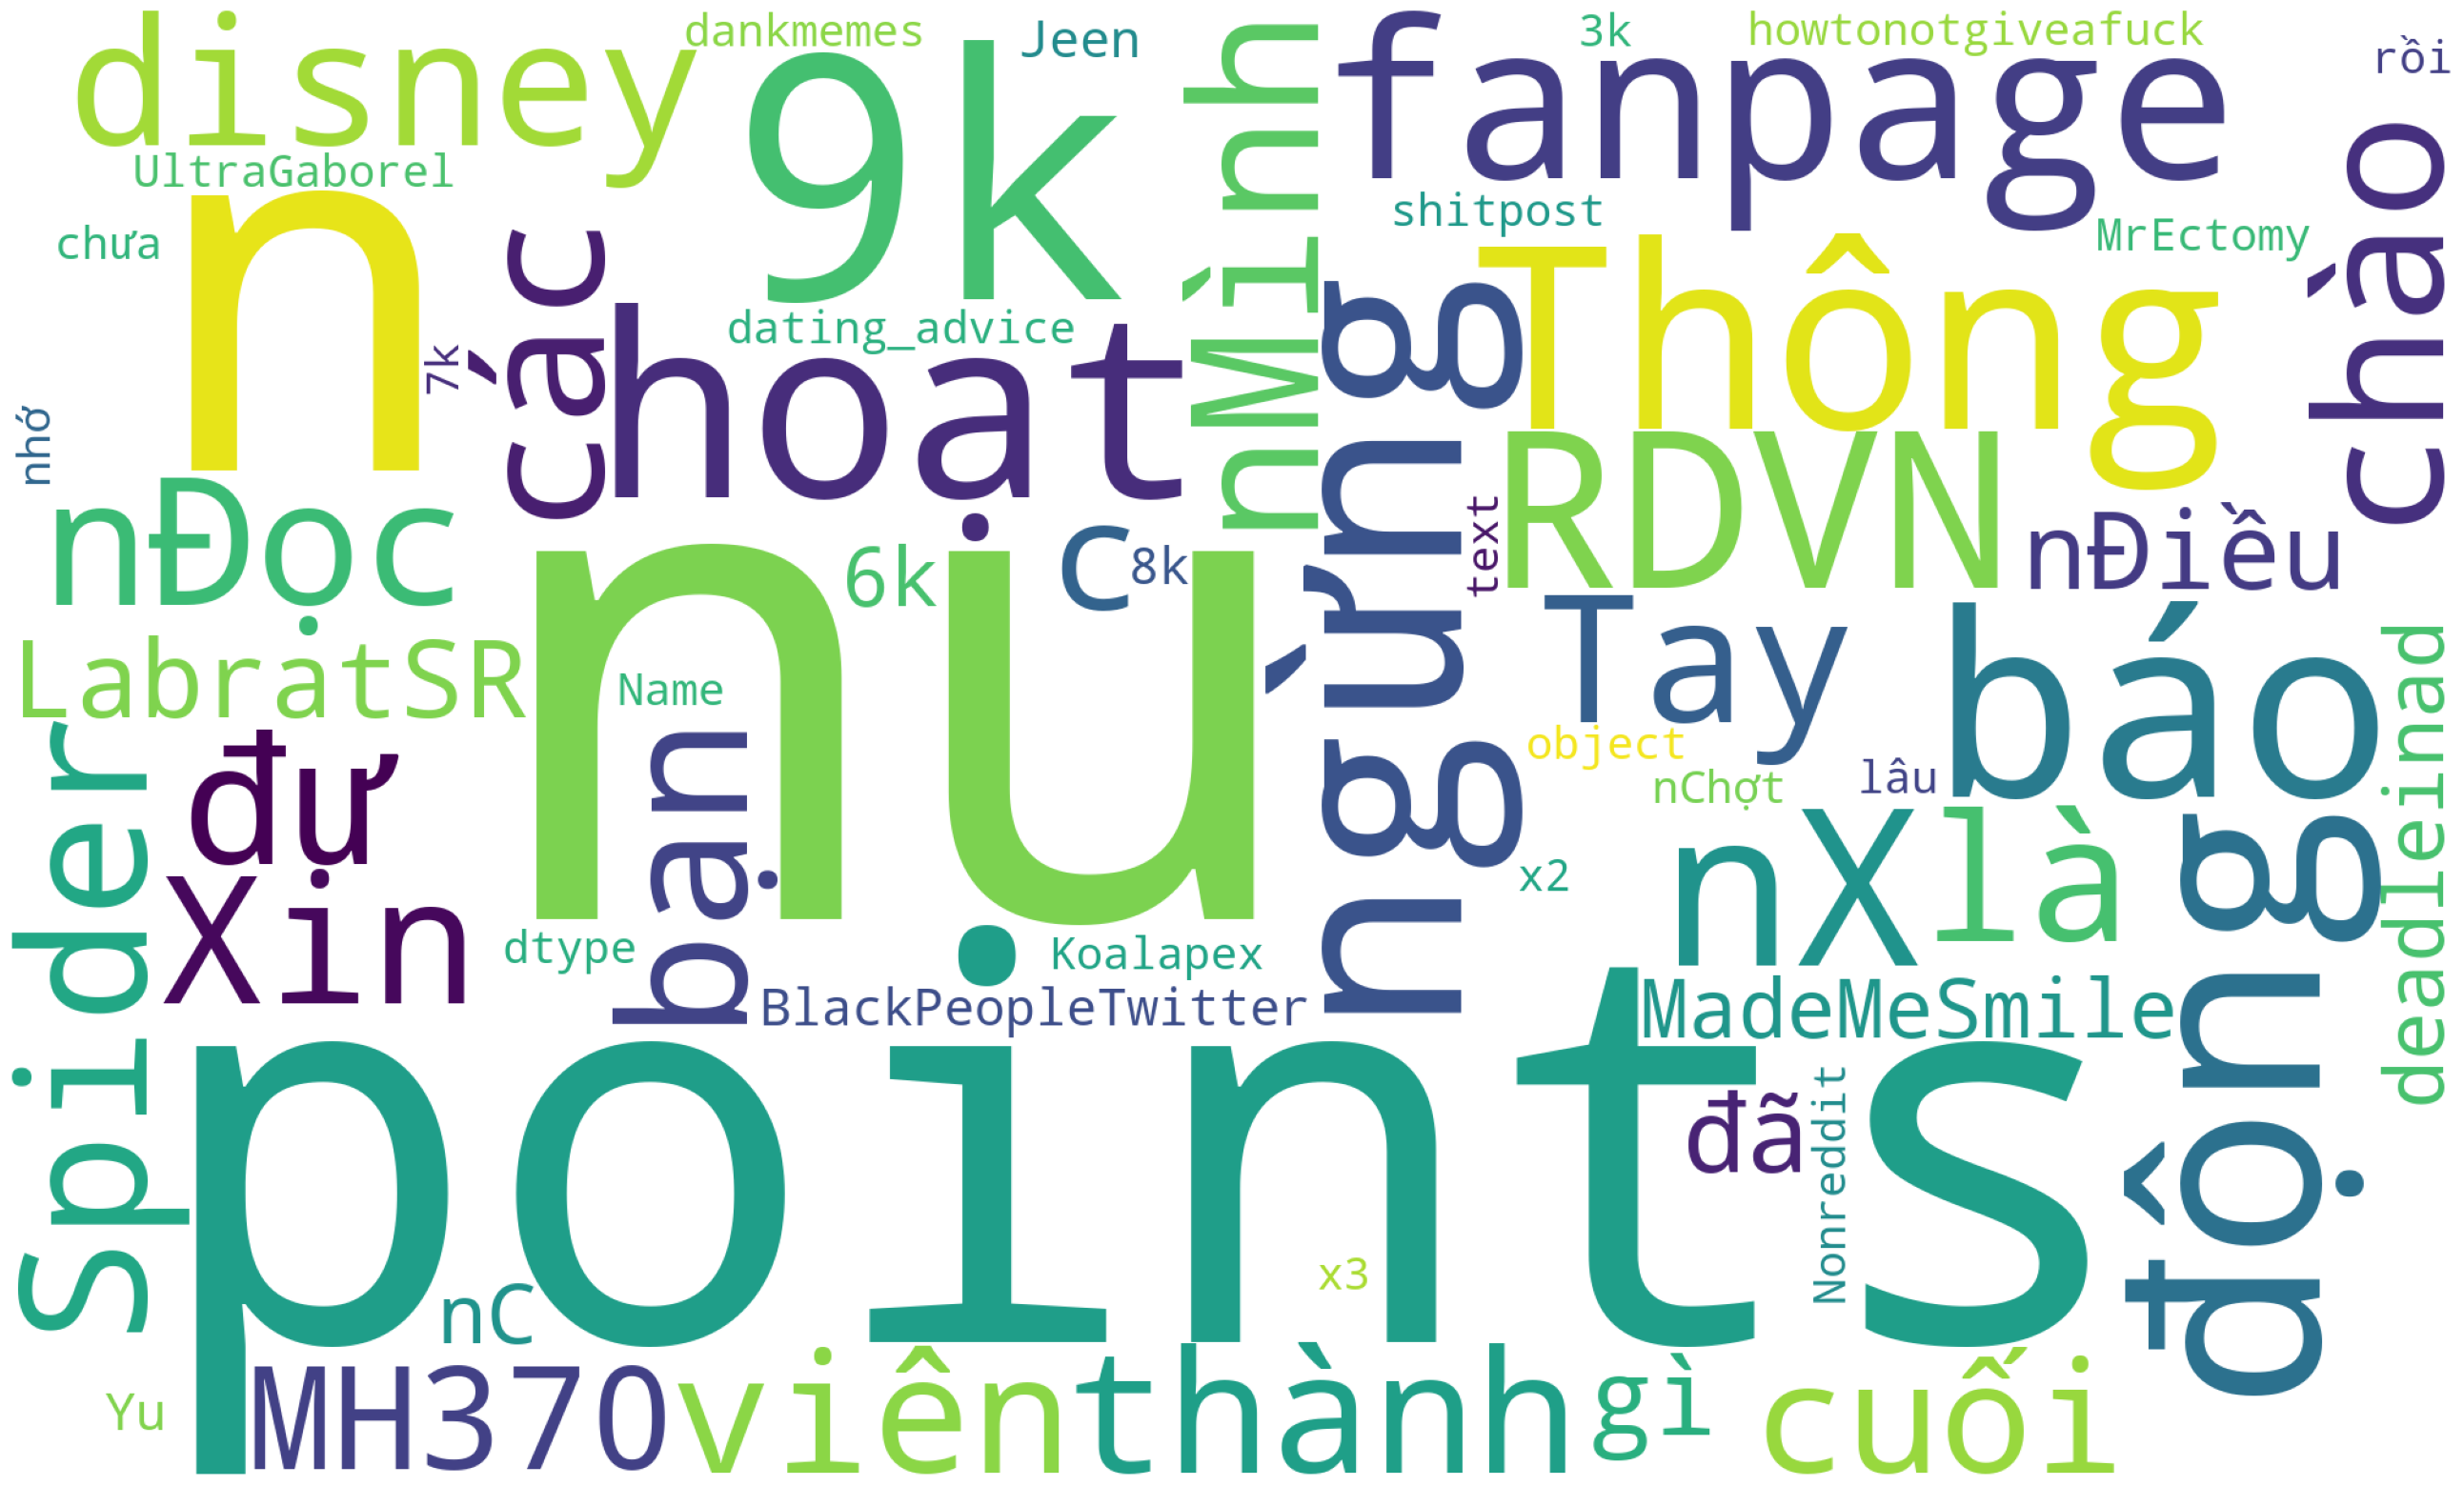

In [22]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white', 
                      max_words=300,
                      width=2000, height=1200
                         ).generate(
                             text)
plt.figure(figsize=(40,20))
plt.clf()
plt.imshow(wordcloud)
plt.axis('off')
plt.show()


CÁC MỐC THỜI GIAN TRONG NGÀY MÀ FANPAGE THƯỜNG XUYÊN ĐĂNG BÀI VIẾT

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 [Text(0, 0, '21'),
  Text(1, 0, '11'),
  Text(2, 0, '8'),
  Text(3, 0, '18'),
  Text(4, 0, '19'),
  Text(5, 0, '20'),
  Text(6, 0, '12'),
  Text(7, 0, '17'),
  Text(8, 0, '22'),
  Text(9, 0, '10'),
  Text(10, 0, '0'),
  Text(11, 0, '23'),
  Text(12, 0, '9'),
  Text(13, 0, '13'),
  Text(14, 0, '15')])

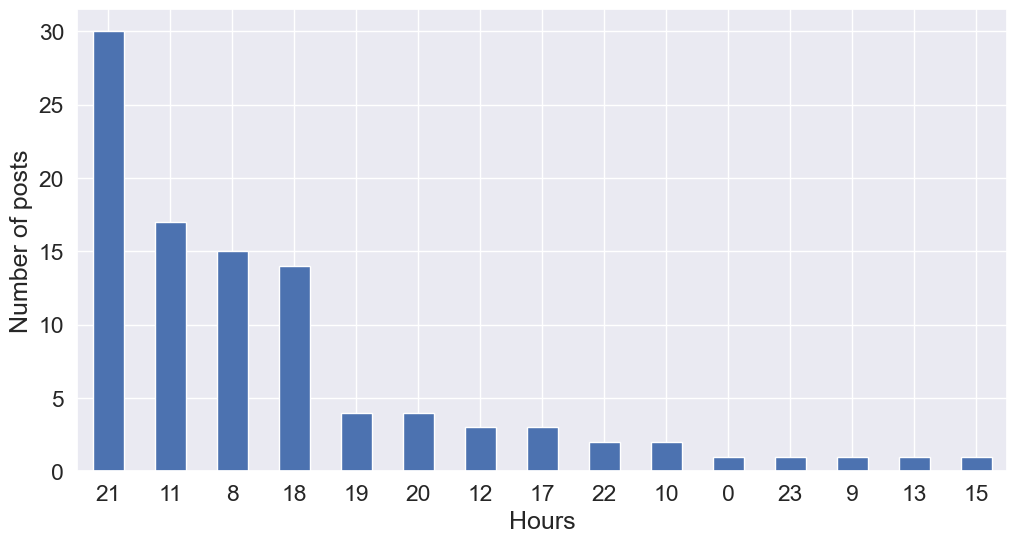

In [23]:
# Extract the hour from the 'time' column
df['hour'] = df['time'].dt.hour
plt.figure(figsize=(12,6))
df['hour'].value_counts().plot(kind='bar')
plt.ylabel('Number of posts')
plt.xlabel('Hours')
plt.xticks(rotation=0)


Những khoảng thời gian nhận được nhiều tương tác nhất trong ngày

Text(0.5, 0, 'Hours')

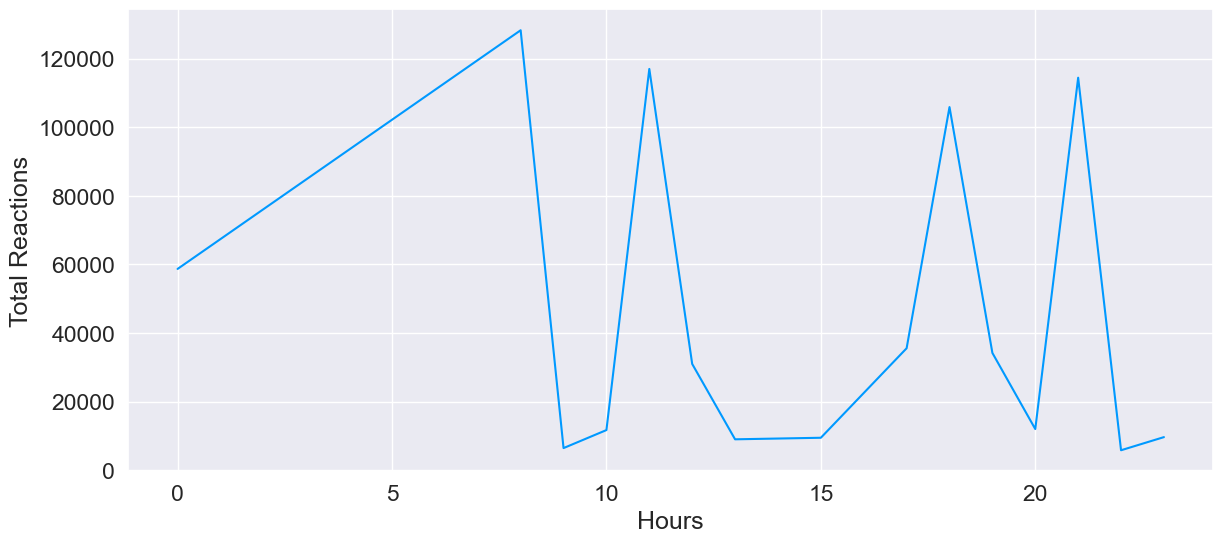

In [24]:
total_reactions_by_hour = df.groupby('hour')['reaction_count'].sum()

fig,ax=plt.subplots(figsize=(14,6))

ax.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Reactions')
ax.set_ylabel('Total Reactions')
ax.tick_params(axis='y')

plt.xlabel('Hours')

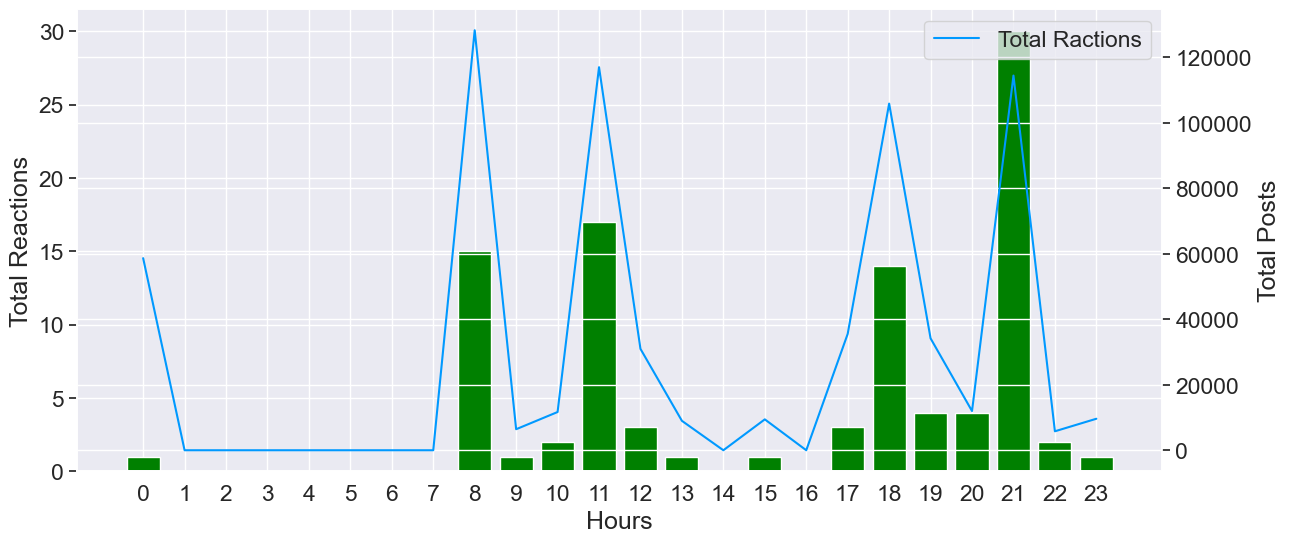

In [25]:
total_posts_by_hour = df['hour'].value_counts()

total_posts_by_hour = total_posts_by_hour.reindex(range(24), fill_value=0)
total_reactions_by_hour = total_reactions_by_hour.reindex(range(24), fill_value=0)

fig, ax1 = plt.subplots(figsize=(14, 6))
ax2 = ax1.twinx()

ax1.bar(total_posts_by_hour.index, total_posts_by_hour.values, color='green', label='Total Posts')
ax1.set_xticks(total_reactions_by_hour.index)
ax1.set_xlabel('Hours')
ax1.set_ylabel('Total Reactions')
ax1.tick_params(axis='y')


ax2.plot(total_reactions_by_hour.index, total_reactions_by_hour.values, color='#0099FF', label='Total Ractions')
ax2.set_ylabel('Total Posts')
ax2.tick_params(axis='y')

plt.xlabel('Hours')
plt.legend()

In [26]:
df[['post_id','reactions','reaction_count','shares','comments','post_text']]

,post_id,reactions,reaction_count,shares,comments,post_text
0,3218746788224789,"{'thích': 934, 'yêu thích': 489, 'haha': 2, 'w...",1481,56,45,SECRET SANTA 2020 V LI TM BIT\n\n\n\nVy l mt ...
1,3022854274480709,"{'thích': 1158, 'yêu thích': 340, 'haha': 5, '...",1557,75,513,Ding dong ding dong ding dong Cc bn c nghe tin...
2,3018251171607686,"{'thích': 868, 'yêu thích': 258, 'haha': 8, 'w...",1170,54,246,n ng k tham gia s kin Secret Santa nm 2020 c t...
3,3018250674941069,"{'thích': 3619, 'yêu thích': 843, 'haha': 40, ...",4622,34,213,on xem chuyn g s xy ra vo 1900 ngy 11112020
4,2974690422630428,"{'thích': 527, 'yêu thích': 60, 'haha': 4, 'wo...",604,37,16,Harperween\n\nrnosleep\nudrharper\n\nTP 3 H s ...
...,...,...,...,...,...,...
94,2274543335978477,"{'thích': 1761, 'yêu thích': 147, 'haha': 697,...",2619,387,140,rvideos\nuMyLigaments 838k points x1 platinum...
95,2274034079362736,"{'thích': 4161, 'yêu thích': 1621, 'haha': 5, ...",6873,236,38,rpics\nuPontusPilates 24k points x1 silver\n\...
96,2271818036251007,"{'thích': 7175, 'yêu thích': 149, 'haha': 10, ...",7936,539,287,rtodayilearned\nuiQuanah 14k points\n\nChuyn m...
97,2271907529575391,"{'thích': 4207, 'yêu thích': 228, 'haha': 1923...",6387,409,288,Gii thiu subreddit rIDontWorkHereLady l subred...


SỰ TƯƠNG QUAN GIỮA SỐ LƯỢNG REACTIONS VÀ SỐ LƯỢNG BÌNH LUẬN, CHIA SẺ, ĐỘ DÀI BÀI VIẾT 

Text(0.5, 1.0, 'Reaction Count v Shares')

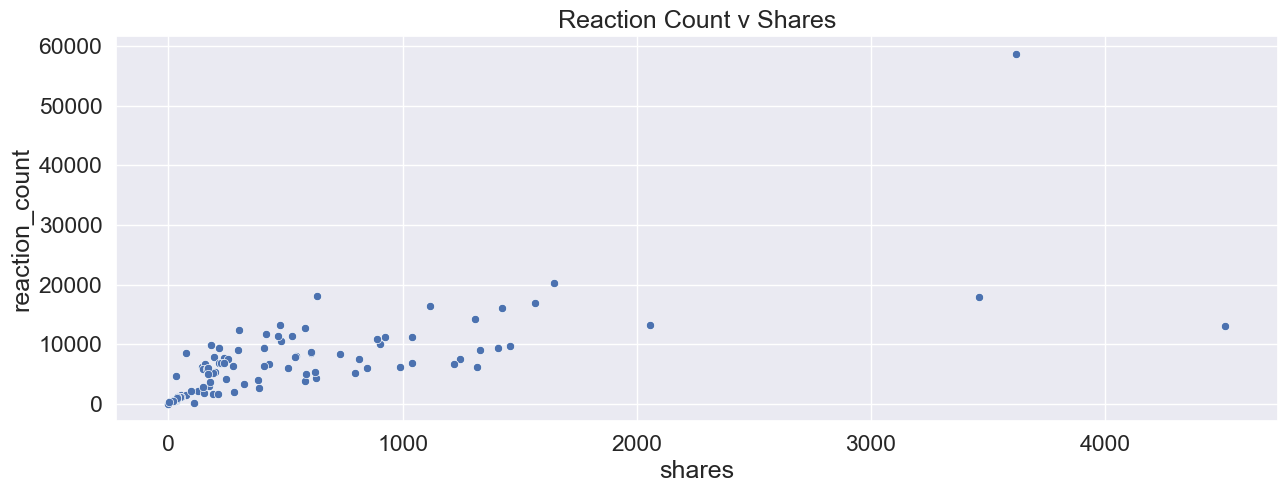

In [27]:
# plt.subplot(1,3,1)
sns.scatterplot(x='shares', y='reaction_count', data=df_detailReactions)
plt.title('Reaction Count v Shares')

Text(0.5, 1.0, 'Reaction Count v Comments')

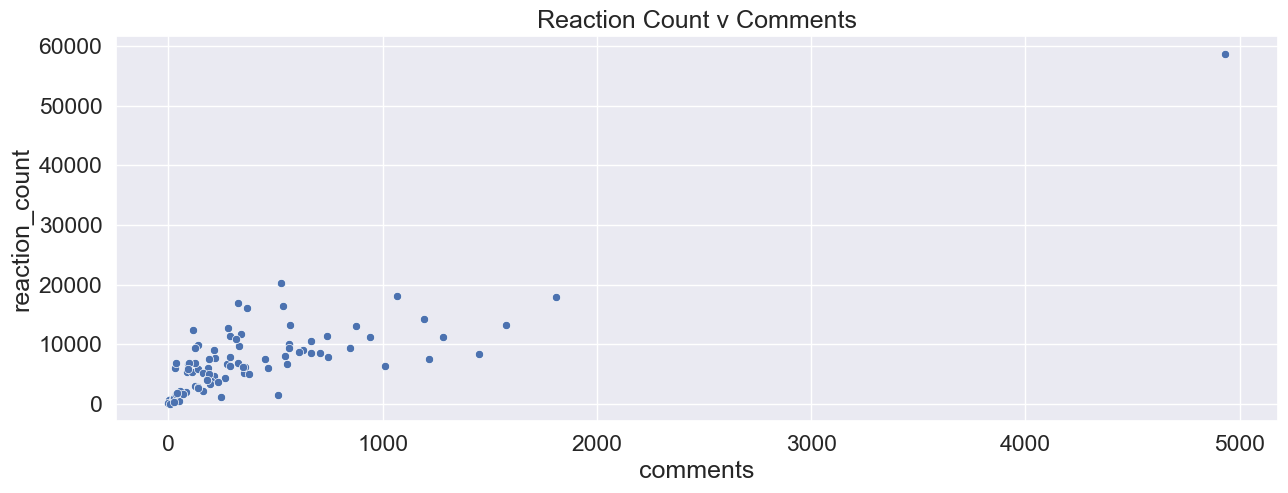

In [28]:
# plt.subplot(1,3,2)
sns.scatterplot(x='comments', y='reaction_count', data=df_detailReactions)
plt.title('Reaction Count v Comments')

Text(0.5, 1.0, 'Reaction Count vs Post Length')

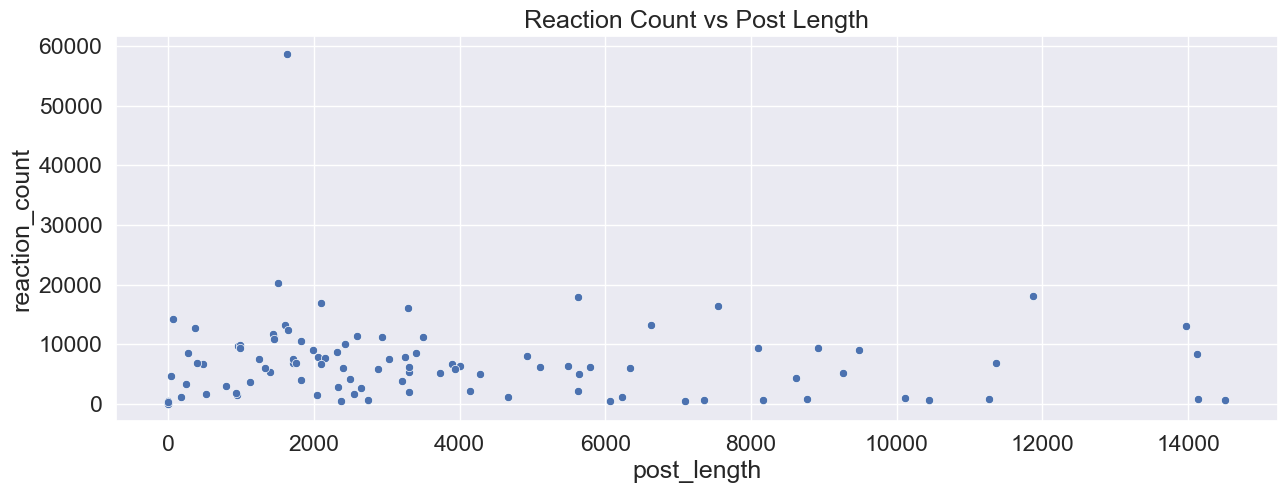

In [29]:
# plt.subplot(1,3,3)
df_detailReactions['post_length'] = df_detailReactions['post_text'].apply(lambda x:len(str(x)))
sns.scatterplot(x='post_length', y='reaction_count', data=df_detailReactions)
plt.title('Reaction Count vs Post Length')

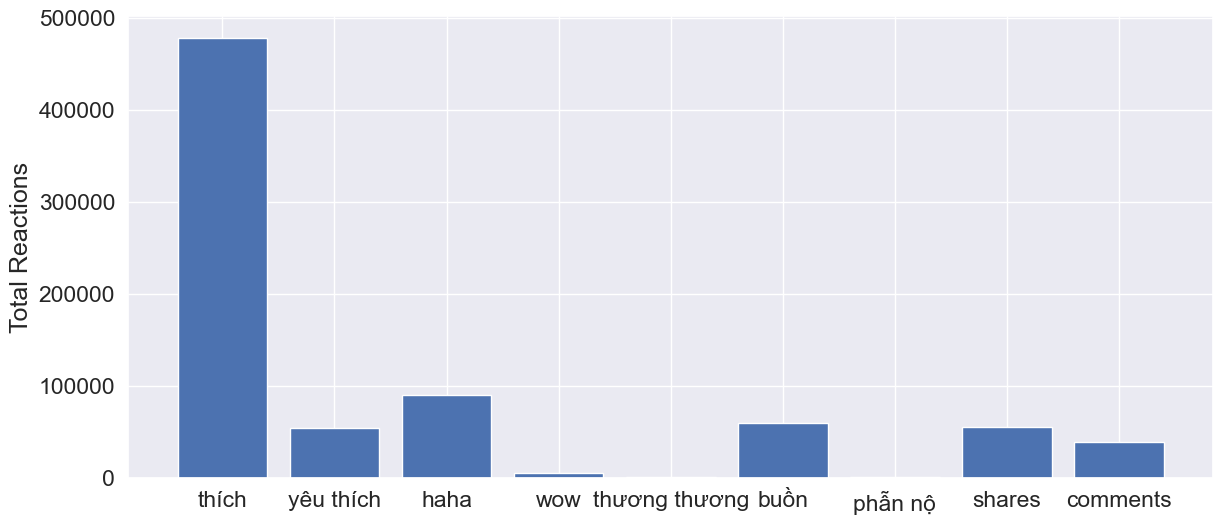

In [32]:
total_reactions = df_detailReactions[['thích', 'yêu thích', 'haha', 'wow', 'thương thương', 'buồn', 'phẫn nộ', 'shares', 'comments']].sum()
plt.figure(figsize=(14, 6))

plt.bar(total_reactions.index, total_reactions.values)

plt.ylabel('Total Reactions')
plt.ticklabel_format(style='plain', axis='y')
plt.show()